# Z Clustering Final

This project aims to categorize teams across the major five leagues by analyzing their Expected Goals (xG) versus Expected Goals Against (xGA) metrics. 
														The goal is to identify similarities and connections between teams, offering insights into their statistical tendencies. 
														By clustering teams, the project seeks to anticipate the expected statistical performance when two teams from different or 
														similar clusters face off. Subsequently, the data is visualized using Tableau for better comprehension and analysis.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, dendrogram

In [213]:
# import the dataset 
bundesliga_df = pd.read_excel('/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/TotalStandings(Cleansed)/Bundesliga.xlsx')
laliga_df = pd.read_excel('/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/TotalStandings(Cleansed)/La Liga.xlsx')
seriea_df = pd.read_excel('/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/TotalStandings(Cleansed)/Serie A.xlsx')
ligue1_df = pd.read_excel('/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/TotalStandings(Cleansed)/Ligue 1.xlsx')
epl_df = pd.read_excel('/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/TotalStandings(Cleansed)/EPL.xlsx')

In [214]:
# Add a new variable for each league
bundesliga_df['League'] = 'Bundesliga'
laliga_df['League'] = 'La Liga'
seriea_df['League'] = 'Serie A'
ligue1_df['League'] = 'Ligue 1'
epl_df['League'] = 'EPL'

# concatenate dataframes
frames = [bundesliga_df, laliga_df, seriea_df, ligue1_df, epl_df]
df = pd.concat(frames).reset_index()


df.head(2)

,index,Team,M,W,D,L,G,GA,PTS,xG,...,PTS_y,xG_y,xGA_y,xPTS_y,xG per Game_y,xGA per Game_y,xPTS per Game_y,xG per Game Diff_y,xGA per Game Diff_y,League
0,0,Bayer Leverkusen,16,13,3,0,46,12,42,38.765622,...,17,13.477872,10.418902,11.7629,1.92541,1.488415,1.680414,0.503161,0.631272,Bundesliga
1,1,Bayern Munich,15,12,2,1,49,15,38,47.062550,...,19,21.188320,6.434443,19.8343,2.64854,0.804305,2.479287,-0.273540,-0.445695,Bundesliga


In [146]:
df = df[df['League'] == 'EPL']

## Hierarchical Clustering

In [31]:
df.columns

Index(['index', 'Team', 'M', 'W', 'D', 'L', 'G', 'GA', 'PTS', 'xG', 'xGA',
       'xPTS', 'xG per Game', 'xGA per Game', 'xPTS per Game',
       'xG per Game Diff', 'xGA per Game Diff', 'M_x', 'W_x', 'D_x', 'L_x',
       'G_x', 'GA_x', 'PTS_x', 'xG_x', 'xGA_x', 'xPTS_x', 'xG per Game_x',
       'xGA per Game_x', 'xPTS per Game_x', 'xG per Game Diff_x',
       'xGA per Game Diff_x', 'M_y', 'W_y', 'D_y', 'L_y', 'G_y', 'GA_y',
       'PTS_y', 'xG_y', 'xGA_y', 'xPTS_y', 'xG per Game_y', 'xGA per Game_y',
       'xPTS per Game_y', 'xG per Game Diff_y', 'xGA per Game Diff_y',
       'League', 'cluster'],
      dtype='object')

### Define Function

In [215]:
def clustering(df, number_cluster):
    #df = df[df['League'] == league]
    
    # Preprocessing always need Standardization -> x and y axis must have the same range (see Clustering notes)
    X = df[['xG per Game', 'xGA per Game']]
    scaler = StandardScaler()
    scaler.fit(X)
    standardized = scaler.transform(X)
    
    X = df[['xG per Game', 'xGA per Game']]
    scaler = MinMaxScaler()
    scaler.fit(X)
    normalized = scaler.transform(X)
    
    n_clusts = list(range(2,15))
    sils = []
    for n in n_clusts:
        clm = AgglomerativeClustering(n_clusters=n).fit(normalized)
        sils.append(silhouette_score(normalized, clm.labels_))
        
    clm = AgglomerativeClustering(n_clusters=number_cluster).fit(normalized)
    print(f'Sillhouette Score: {silhouette_score(normalized, clm.labels_)}')

    gif, ax = plt.subplots(figsize=(5,2))
    ax.plot(n_clusts, sils, marker="o")
    ax.set_xlabel("No of clusters")
    ax.set_ylabel("Silhouetter Score")
    plt.show()
    
    df['cluster'] = clm.labels_
    
    g = sns.pairplot(df[['xG per Game', 'xGA per Game', "cluster"]], hue="cluster", diag_kind="kde", palette="Set1")
    g.map_lower(sns.kdeplot, color="0.2")
    plt.show()
    
    
    return df

## English Premier League (EPL)

Sillhouette Score: 0.4368246485836593


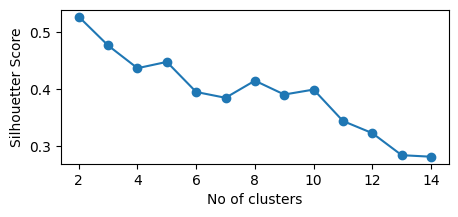

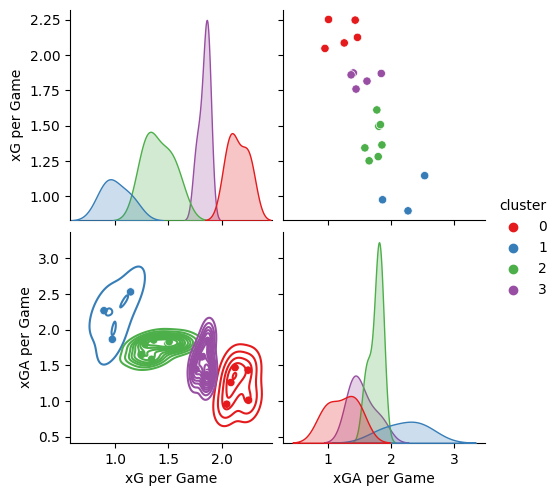

,Team,M,W,D,L,G,GA,PTS,xG,xGA,...,xG_y,xGA_y,xPTS_y,xG per Game_y,xGA per Game_y,xPTS per Game_y,xG per Game Diff_y,xGA per Game Diff_y,League,cluster
0,Liverpool,19,12,6,1,39,16,42,39.639150,23.968039,...,17.278349,15.247284,14.8006,1.727835,1.524728,1.480060,-0.027835,0.524728,EPL,0
1,Arsenal,19,12,4,3,36,18,40,38.901037,18.186354,...,15.659609,8.639507,16.0888,1.739957,0.959945,1.787644,-0.184401,0.071056,EPL,0
2,Aston Villa,19,12,3,4,40,25,39,35.599642,26.701542,...,15.815973,18.008634,13.3966,1.581597,1.800863,1.339660,-0.181597,-0.099137,EPL,3


In [216]:
epl_clustering = clustering(epl_df, 4)
epl_clustering.head(3)

## Bundesliga

Sillhouette Score: 0.5272422011925673


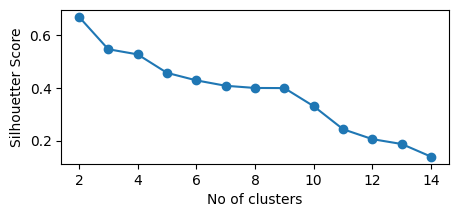

/Users/enzovillafuerte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


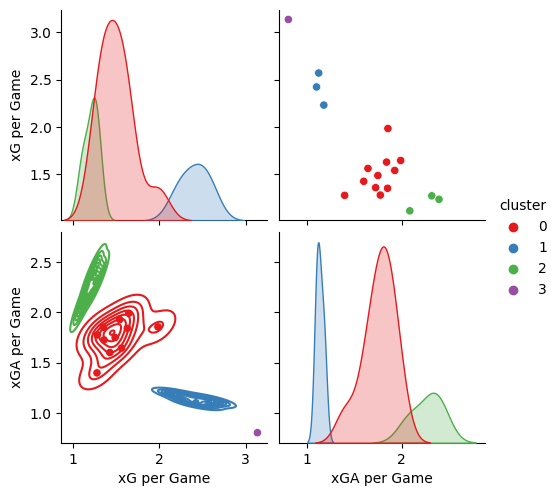

,Team,M,W,D,L,G,GA,PTS,xG,xGA,...,xG_y,xGA_y,xPTS_y,xG per Game_y,xGA per Game_y,xPTS per Game_y,xG per Game Diff_y,xGA per Game Diff_y,League,cluster
0,Bayer Leverkusen,16,13,3,0,46,12,42,38.765622,17.626831,...,13.477872,10.418902,11.7629,1.925410,1.488415,1.680414,0.503161,0.631272,Bundesliga,1
1,Bayern Munich,15,12,2,1,49,15,38,47.062550,12.058077,...,21.188320,6.434443,19.8343,2.648540,0.804305,2.479287,-0.273540,-0.445695,Bundesliga,3
2,VfB Stuttgart,16,11,1,4,37,19,34,41.128647,17.996539,...,12.368467,9.621453,12.6138,1.766924,1.374493,1.801971,-0.195495,-0.339792,Bundesliga,1


In [217]:
bundesliga_clustering = clustering(bundesliga_df, 4)
bundesliga_clustering.head(3)

## La Liga

Sillhouette Score: 0.5121155438230524


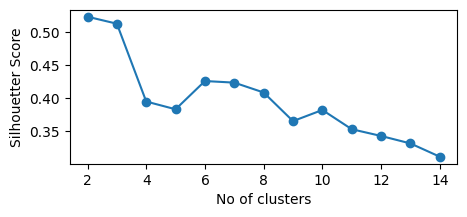

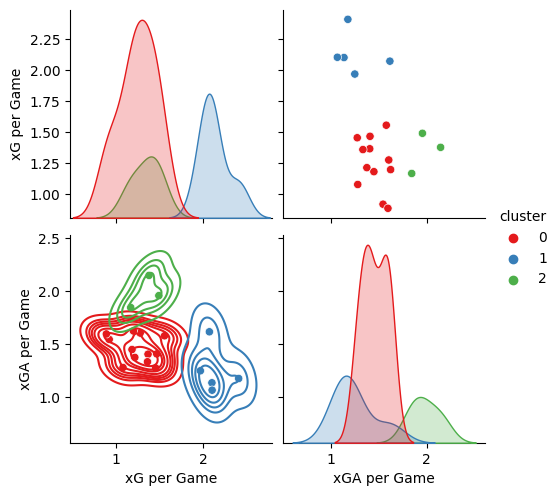

,Team,M,W,D,L,G,GA,PTS,xG,xGA,...,xG_y,xGA_y,xPTS_y,xG per Game_y,xGA per Game_y,xPTS per Game_y,xG per Game Diff_y,xGA per Game Diff_y,League,cluster
0,Girona,18,14,3,1,42,21,45,37.320688,29.077617,...,19.698240,17.641775,13.6351,2.188693,1.960197,1.515011,0.144640,0.737975,La Liga,1
1,Real Madrid,18,14,3,1,39,11,45,37.847784,20.421126,...,16.193824,13.892903,15.3641,1.619382,1.389290,1.536410,0.180618,0.689290,La Liga,1
2,Atletico Madrid,18,12,2,4,36,19,38,35.448186,22.458819,...,10.690076,12.189125,10.3895,1.336259,1.523641,1.298687,0.288741,0.523641,La Liga,1


In [218]:
laliga_clustering = clustering(laliga_df, 3)
laliga_clustering.head(3)

## Serie A

Sillhouette Score: 0.4659461058105926


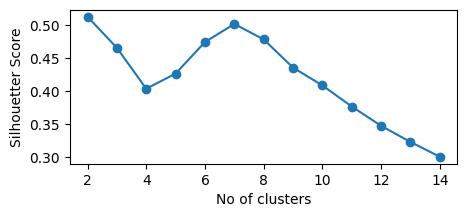

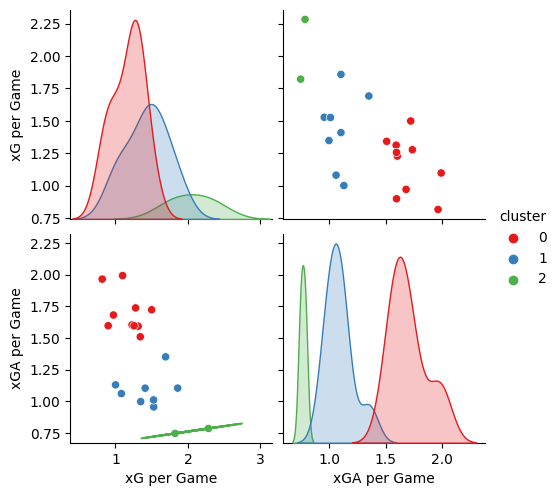

,Team,M,W,D,L,G,GA,PTS,xG,xGA,...,xG_y,xGA_y,xPTS_y,xG per Game_y,xGA per Game_y,xPTS per Game_y,xG per Game Diff_y,xGA per Game Diff_y,League,cluster
0,Inter,17,14,2,1,41,7,44,38.809530,13.352837,...,14.255516,6.307038,16.6757,1.781940,0.788380,2.084462,0.468060,0.538380,Serie A,2
1,Juventus,17,12,4,1,26,11,40,30.975728,12.690316,...,15.485283,8.144226,17.5449,1.720587,0.904914,1.949433,-0.165031,0.127136,Serie A,2
2,AC Milan,17,10,3,4,31,20,33,28.766224,22.981365,...,15.321604,13.307383,14.7244,1.702400,1.478598,1.636044,0.186488,-0.299180,Serie A,1


In [219]:
seriea_clustering = clustering(seriea_df, 3)
seriea_clustering.head(3)

## Ligue 1

Sillhouette Score: 0.41692261175695067


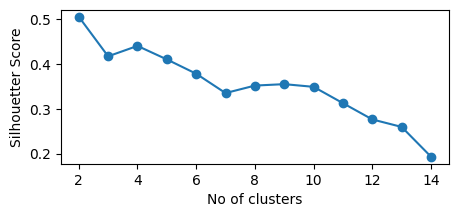

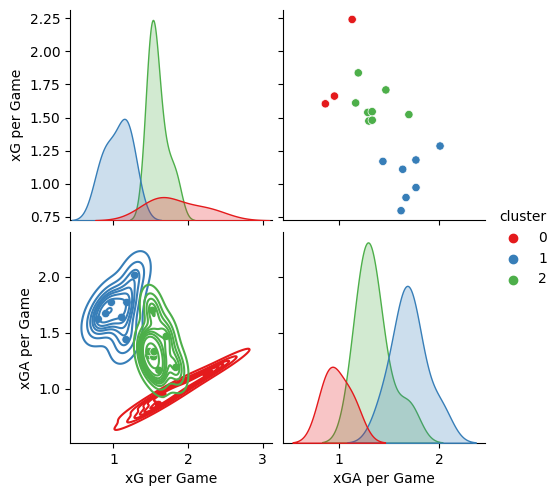

,Team,M,W,D,L,G,GA,PTS,xG,xGA,...,xG_y,xGA_y,xPTS_y,xG per Game_y,xGA per Game_y,xPTS per Game_y,xG per Game Diff_y,xGA per Game Diff_y,League,cluster
0,Paris Saint Germain,17,12,4,1,42,14,40,38.092150,19.199269,...,20.939860,13.096270,15.7596,2.617482,1.637034,1.969950,-0.492482,0.887034,Ligue 1,0
1,Nice,17,10,5,2,19,9,35,27.260108,14.626523,...,12.645150,8.092946,14.1795,1.580644,1.011618,1.772438,-0.580644,0.136618,Ligue 1,0
2,Monaco,17,10,3,4,33,22,33,31.233618,20.245233,...,18.404248,13.687730,14.3620,2.044916,1.520859,1.595778,-0.044916,-0.368030,Ligue 1,2


In [220]:
ligue1_clustering = clustering(ligue1_df, 3)
ligue1_clustering.head(3)

## Concatenating all the new dataframes into one csv file for Exporting it into Tableau

In [221]:
# concatenate dataframes
frames = [bundesliga_clustering, laliga_clustering, seriea_clustering, ligue1_clustering, epl_clustering]
clustered_df = pd.concat(frames).reset_index()
clustered_df.to_csv('Clustered_Teams_Stats.csv', index=False)
clustered_df

,index,Team,M,W,D,L,G,GA,PTS,xG,...,xG_y,xGA_y,xPTS_y,xG per Game_y,xGA per Game_y,xPTS per Game_y,xG per Game Diff_y,xGA per Game Diff_y,League,cluster
0,0,Bayer Leverkusen,16,13,3,0,46,12,42,38.765622,...,13.477872,10.418902,11.7629,1.925410,1.488415,1.680414,0.503161,0.631272,Bundesliga,1
1,1,Bayern Munich,15,12,2,1,49,15,38,47.062550,...,21.188320,6.434443,19.8343,2.648540,0.804305,2.479287,-0.273540,-0.445695,Bundesliga,3
2,2,VfB Stuttgart,16,11,1,4,37,19,34,41.128647,...,12.368467,9.621453,12.6138,1.766924,1.374493,1.801971,-0.195495,-0.339792,Bundesliga,1
3,3,RasenBallsport Leipzig,16,10,3,3,38,17,33,35.695127,...,14.731504,9.692400,14.1097,1.841438,1.211550,1.763713,-0.091438,-0.163450,Bundesliga,1
4,4,Borussia Dortmund,16,7,6,3,30,25,27,31.730780,...,12.706390,15.329210,8.6417,1.815199,2.189887,1.234529,0.184801,0.618459,Bundesliga,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,15,Crystal Palace,19,4,6,9,19,28,18,25.516465,...,13.599349,17.762398,11.5570,1.359935,1.776240,1.155700,-0.259935,0.276240,EPL,2
92,16,Nottingham Forest,19,4,5,10,22,34,17,23.777671,...,11.634681,20.152982,8.9130,1.163468,2.015298,0.891300,-0.163468,0.015298,EPL,2
93,17,Luton,18,4,3,11,21,34,15,20.631746,...,8.618614,29.162960,2.3377,0.957624,3.240329,0.259744,0.153487,1.018107,EPL,1
94,18,Burnley,19,3,2,14,18,38,11,18.533750,...,6.703393,17.673135,5.6933,0.744821,1.963682,0.632589,0.144067,0.408126,EPL,1
